In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
train_df = pd.read_csv("data/train.csv")

In [46]:
train_df.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


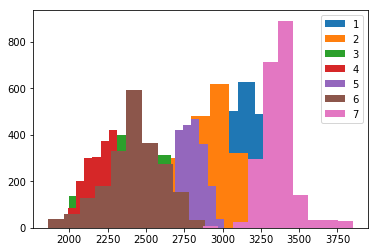

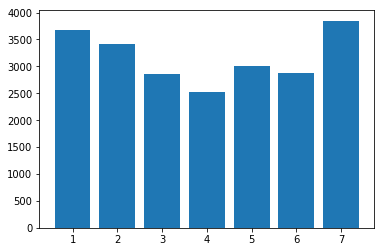

In [47]:
# plot histogram of Elevation for each cover type
for i in range(1,8):
 plt.hist(train_df[train_df["Cover_Type"] == i].Elevation, label=str(i))
 plt.legend(loc='upper right')
plt.show()

# bar plot
plt.bar(train_df["Cover_Type"], train_df["Elevation"])
plt.show()

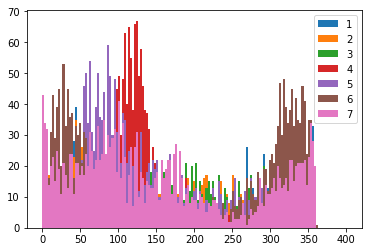

In [48]:
# plot histogram of Aspect for each cover type
bins = np.linspace(0, 400, 150)
for i in range(1,8):
 plt.hist(train_df[train_df["Cover_Type"] == i].Aspect, bins=bins, label=str(i))
 plt.legend(loc='upper right')
plt.show()

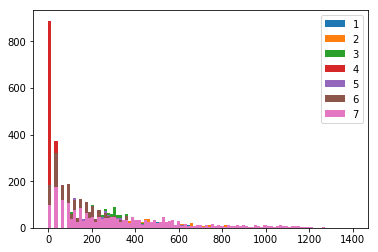

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [49]:
# plot histogram of Horizontal_Distance_To_Hydrology for each cover type
bins = np.linspace(0, 1400, 100)
for i in range(1,8):
 plt.hist(train_df[train_df["Cover_Type"] == i].Horizontal_Distance_To_Hydrology, bins=bins, label=str(i))
 plt.legend(loc='upper right')
plt.show()

train_df[train_df["Horizontal_Distance_To_Hydrology"] < 0]
#train_df[train_df["Cover_Type"] == 1].Horizontal_Distance_To_Hydrology

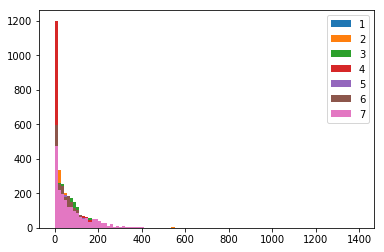

In [51]:
# plot histogram of Vertical_Distance_To_Hydrology for each cover type
for i in range(1,8):
 plt.hist(train_df[train_df["Cover_Type"] == i].Vertical_Distance_To_Hydrology, bins=bins, label=str(i))
 plt.legend(loc='upper right')
plt.show()

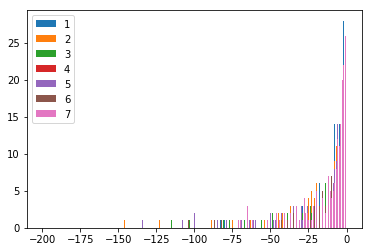

51

In [52]:
# plot histogram of negative Vertical_Distance_To_Hydrology for each cover type
bins = np.linspace(-200, 0, 400)
for i in range(1,8):
 plt.hist(train_df[(train_df["Cover_Type"] == i) & (train_df["Vertical_Distance_To_Hydrology"] < 0)].Vertical_Distance_To_Hydrology, bins=bins, label=str(i))
 plt.legend(loc='upper left')
plt.show()

# why does't red show up in the graph when there are rows
len(train_df[(train_df["Cover_Type"] == 4) & (train_df["Vertical_Distance_To_Hydrology"] < 0)])

In [53]:
# range of Elevation for each cover type
for i in range(1,8):
 print ("cover_type %s Elevation range: [%s,%s]" %(i,train_df[train_df["Cover_Type"] == i].Elevation.min(),train_df[train_df["Cover_Type"] == i].Elevation.max()))

cover_type 1 Elevation range: [2525,3675]
cover_type 2 Elevation range: [2169,3413]
cover_type 3 Elevation range: [1903,2850]
cover_type 4 Elevation range: [1989,2526]
cover_type 5 Elevation range: [2482,3007]
cover_type 6 Elevation range: [1863,2883]
cover_type 7 Elevation range: [2870,3849]


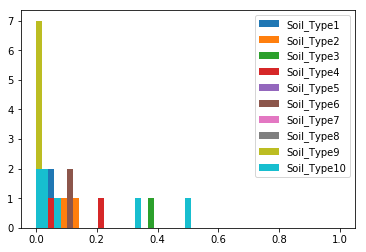

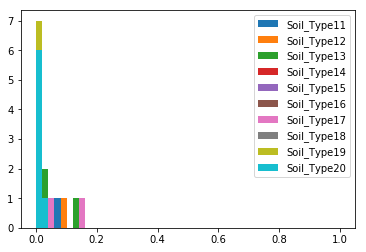

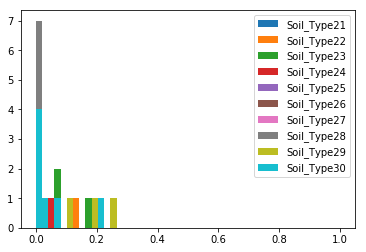

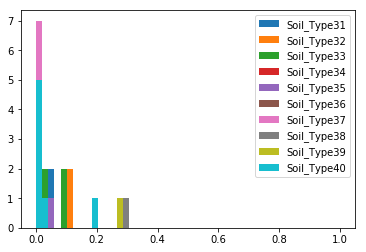

In [68]:
# take mean of each soil type for each group and plot
bins = np.linspace(0, 1, 50)
k = 1
l = 11
for j in range(4):
 for i in range(k,l):
  column_name = "Soil_Type" + str(i)
  df = train_df.groupby('Cover_Type')[column_name].mean()
  plt.hist(df, bins=bins, label = column_name)
  plt.legend(loc='upper right')
 plt.show()
 k = k + 10
 l = l + 10